In [ ]:
# Install the 'medicaldata' package
install.packages("medicaldata")

# Load the 'medicaldata' package
library(medicaldata)

# Load the 'strep_tb' dataset
data(strep_tb)

# View the documentation for the 'strep_tb' dataset
?strep_tb

head(strep_tb)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,patient_id,arm,dose_strep_g,dose_PAS_g,gender,baseline_condition,baseline_temp,baseline_esr,baseline_cavitation,strep_resistance,radiologic_6m,rad_num,improved
,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<lgl>
1,0001,Control,0,0,M,1_Good,1_98-98.9F,2_11-20,yes,1_sens_0-8,6_Considerable_improvement,6,TRUE
2,0002,Control,0,0,F,1_Good,3_100-100.9F,2_11-20,no,1_sens_0-8,5_Moderate_improvement,5,TRUE
3,0003,Control,0,0,F,1_Good,1_98-98.9F,3_21-50,no,1_sens_0-8,5_Moderate_improvement,5,TRUE
4,0004,Control,0,0,M,1_Good,1_98-98.9F,3_21-50,no,1_sens_0-8,5_Moderate_improvement,5,TRUE
5,0005,Control,0,0,F,1_Good,2_99-99.9F,3_21-50,no,1_sens_0-8,5_Moderate_improvement,5,TRUE
6,0006,Control,0,0,M,1_Good,3_100-100.9F,3_21-50,no,1_sens_0-8,6_Considerable_improvement,6,TRUE


In [ ]:
# Load the strep_tb dataset
data(strep_tb)

# 1. Calculate the total number of patients for each gender
gender_counts <- table(strep_tb$gender)
print(paste("Number of Male patients:", gender_counts["M"]))
print(paste("Number of Female patients:", gender_counts["F"]))

# 2. Identify rows representing female patients with "Poor" baseline condition
female_poor_condition <- which(strep_tb$gender == "F" & strep_tb$baseline_condition == "3_Poor")

# 3. Analyze improvement in these patients
# Subset the data for female patients with poor baseline condition
female_poor_subset <- strep_tb[female_poor_condition, ]

# Number and percentage of females with poor baseline condition who improved
num_improved <- sum(female_poor_subset$improved)
percentage_improved <- (num_improved / nrow(female_poor_subset)) * 100
print(paste("Number of improved patients:", num_improved))
print(paste("Percentage of improved patients:", round(percentage_improved, 2), "%"))

# 4. Quantile analysis for 'radnum' in different treatment groups
# Subset data for females with dose_strep_g = 0 and dose_PAS_g = 0
females_dose_0 <- strep_tb[strep_tb$gender == "F" & strep_tb$dose_strep_g == 0 & strep_tb$dose_PAS_g == 0, ]

# Median and IQR for rad_num in females with dose_strep_g = 0 and dose_PAS_g = 0
median_radnum_0 <- quantile(females_dose_0$rad_num, probs = 0.5)
iqr_radnum_0 <- IQR(females_dose_0$rad_num)
print(paste("Median of radnum for females with dose_strep_g = 0 and dose_PAS_g = 0:", median_radnum_0))
print(paste("IQR of radnum for females with dose_strep_g = 0 and dose_PAS_g = 0:", iqr_radnum_0))

# Subset data for females with dose_strep_g = 2 and dose_PAS_g = 0
females_dose_2 <- strep_tb[strep_tb$gender == "F" & strep_tb$dose_strep_g == 2 & strep_tb$dose_PAS_g == 0, ]

# Median and IQR for rad_num in females with dose_strep_g = 2 and dose_PAS_g = 0
median_radnum_2 <- quantile(females_dose_2$rad_num, probs = 0.5)
iqr_radnum_2 <- IQR(females_dose_2$rad_num)
print(paste("Median of radnum for females with dose_strep_g = 2 and dose_PAS_g = 0:", median_radnum_2))
print(paste("IQR of radnum for females with dose_strep_g = 2 and dose_PAS_g = 0:", iqr_radnum_2))


[1] "Number of Male patients: 48"
[1] "Number of Female patients: 59"
[1] "Number of improved patients: 7"
[1] "Percentage of improved patients: 22.58 %"
[1] "Median of radnum for females with dose_strep_g = 0 and dose_PAS_g = 0: 3"
[1] "IQR of radnum for females with dose_strep_g = 0 and dose_PAS_g = 0: 4"
[1] "Median of radnum for females with dose_strep_g = 2 and dose_PAS_g = 0: 5"
[1] "IQR of radnum for females with dose_strep_g = 2 and dose_PAS_g = 0: 3.5"


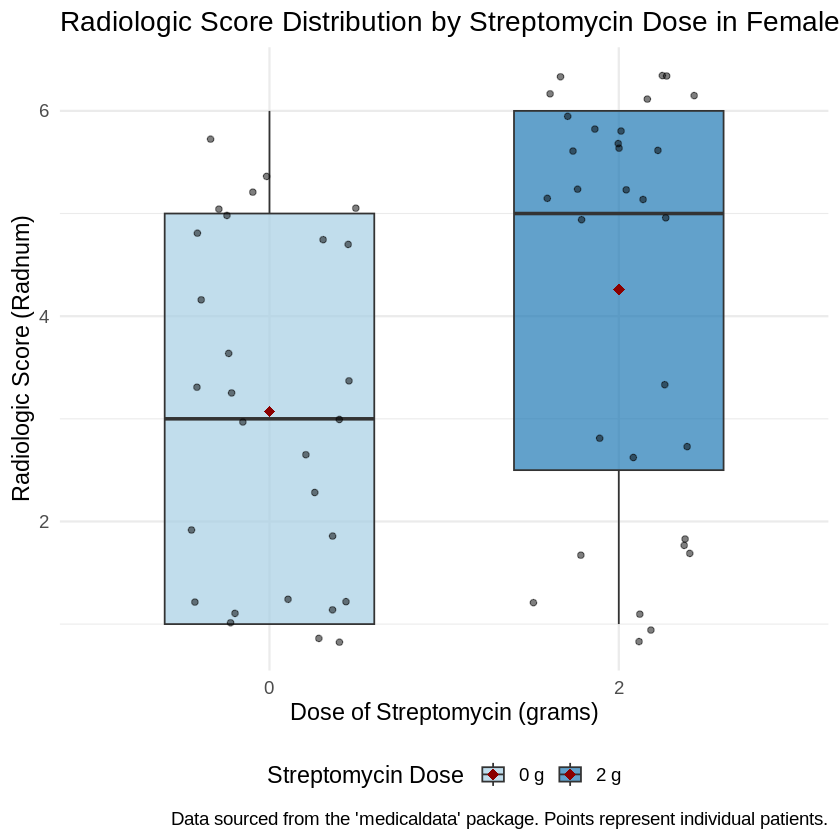

In [ ]:
library(ggplot2)
library(dplyr)

# Subset the data for females
females_data <- strep_tb %>%
                filter(gender == "F" & dose_PAS_g == 0)

# Create a boxplot
ggplot(females_data, aes(x = factor(dose_strep_g), y = rad_num, fill = factor(dose_strep_g))) +
  geom_boxplot(outlier.shape = NA, width = 0.6, alpha = 0.7) +  # Adjust box width and transparency
  geom_jitter(width = 0.25, alpha = 0.5) +  # Add data points with some transparency
  stat_summary(fun = "mean", geom = "point", shape = 18, size = 3, color = "darkred") + # Add mean points
  scale_fill_brewer(palette = "Paired", name = "Streptomycin Dose", labels = c("0 g", "2 g")) + # Colorblind-friendly palette
  labs(title = "Radiologic Score Distribution by Streptomycin Dose in Females",
       x = "Dose of Streptomycin (grams)",
       y = "Radiologic Score (Radnum)",
       caption = "Data sourced from the 'medicaldata' package. Points represent individual patients.") +
  theme_minimal(base_size = 14) + # Increase base font size
  theme(legend.position = "bottom")  # Move legend to the bottom

In [ ]:
# This test will compare the means of rad_num for the two groups (0 gram vs. 2 grams of Streptomycin)
t_test_result <- t.test(rad_num ~ factor(dose_strep_g), data = females_data)
print(t_test_result)


	Welch Two Sample t-test

data:  rad_num by factor(dose_strep_g)
t = -2.5109, df = 56.964, p-value = 0.0149
alternative hypothesis: true difference in means between group 0 and group 2 is not equal to 0
95 percent confidence interval:
 -2.133005 -0.240267
sample estimates:
mean in group 0 mean in group 2 
       3.071429        4.258065 



In [ ]:
# Wilcoxon Test (also known as the Mann-Whitney U test when comparing two groups)
wilcox_test_result <- wilcox.test(rad_num ~ factor(dose_strep_g), data = females_data)
print(wilcox_test_result)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  rad_num by factor(dose_strep_g)
W = 262.5, p-value = 0.008021
alternative hypothesis: true location shift is not equal to 0



In [ ]:
# Check Assumptions for normality
shapiro_test_result <- shapiro.test(females_data$rad_num)
print(shapiro_test_result)


	Shapiro-Wilk normality test

data:  females_data$rad_num
W = 0.85578, p-value = 5.284e-06

